<a href="https://colab.research.google.com/github/chhavic4004/-gdi2019-/blob/main/linear_regression_gdi%20along%20with%20shap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First 5 rows of the dataset:
   HDI Rank                 Country GDI_Value GDI_Group HDI_Female HDI_Male  \
0       NaN                     NaN      2019      2019       2019     2019   
1       1.0                  Norway     0.990         1      0.949    0.959   
2       2.0                 Ireland     0.981         1      0.943    0.961   
3       2.0             Switzerland     0.968         2      0.934    0.965   
4       4.0  Hong Kong, China (SAR)     0.972         2      0.933    0.959   

  Lif_Expec_Female Lif_Excep_Male Excep_Yrs_Schooling_Female  \
0             2019           2019                       2019   
1             84.4           80.4                       18.8   
2             83.9           80.7                       18.8   
3             85.6           81.9                       16.2   
4             87.7           82.0                       17.1   

  Excep_Yrs_Schooling_Male Mean_Yrs_Schooling_Female Mean_Yrs_Schooling_Male  \
0                     2019     

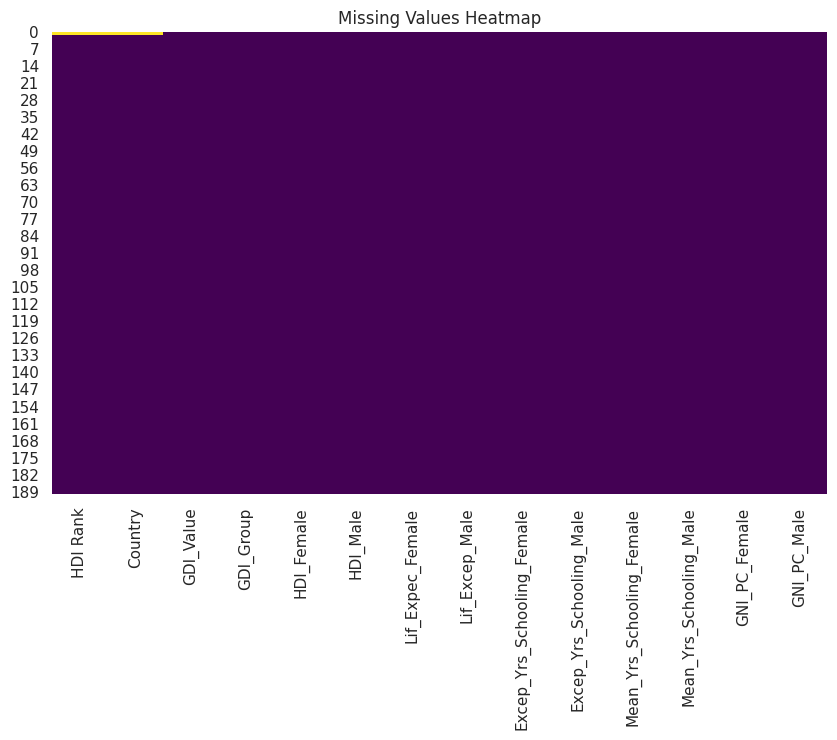


Number of duplicate rows: 0

Categorical columns: ['Country']
Numerical columns: ['HDI Rank', 'GDI_Value', 'GDI_Group', 'HDI_Female', 'HDI_Male', 'Lif_Expec_Female', 'Lif_Excep_Male', 'Excep_Yrs_Schooling_Female', 'Excep_Yrs_Schooling_Male', 'Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male', 'GNI_PC_Female', 'GNI_PC_Male']

Missing values after imputation:
HDI Rank                      0
Country                       0
GDI_Value                     0
GDI_Group                     0
HDI_Female                    0
HDI_Male                      0
Lif_Expec_Female              0
Lif_Excep_Male                0
Excep_Yrs_Schooling_Female    0
Excep_Yrs_Schooling_Male      0
Mean_Yrs_Schooling_Female     0
Mean_Yrs_Schooling_Male       0
GNI_PC_Female                 0
GNI_PC_Male                   0
dtype: int64

Preprocessing complete. Cleaned data saved as 'GDI_cleaned.csv'.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Load the GDI dataset
df = pd.read_csv('GDI.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Display dataset shape
print("\nShape of the dataset:", df.shape)

# Display basic info
print("\nDataset Info:")
print(df.info())

# Display summary statistics
print("\nSummary statistics:")
print(df.describe(include='all'))

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Visualize missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

# Check for duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Drop duplicate rows if any
df = df.drop_duplicates()

# Remove rows where 'Country' is null or not valid (header rows or footers)
df = df[df['Country'].notnull()]

# Convert columns with numeric values stored as strings (with commas) to numeric
cols_with_commas = ['GNI_PC_Female', 'GNI_PC_Male']
for col in cols_with_commas:
    if col in df.columns:
        df[col] = df[col].replace({',': ''}, regex=True)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Convert other relevant columns to numeric, if needed
numeric_columns = [
    'HDI Rank', 'GDI_Value', 'GDI_Group', 'HDI_Female', 'HDI_Male',
    'Lif_Expec_Female', 'Lif_Excep_Male', 'Excep_Yrs_Schooling_Female',
    'Excep_Yrs_Schooling_Male', 'Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male',
    'GNI_PC_Female', 'GNI_PC_Male'
]
for col in numeric_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nCategorical columns:", categorical_cols)
print("Numerical columns:", numerical_cols)

# Handle missing values
for col in categorical_cols:
    mode_val = df[col].mode()[0] if df[col].mode().size > 0 else np.nan
    df[col] = df[col].fillna(mode_val)

for col in numerical_cols:
    if df[col].isnull().sum() > 0:
        # Use mean if possible, else median if all are NaN
        if df[col].mean(skipna=True) == np.nan or np.isnan(df[col].mean(skipna=True)):
            median_val = df[col].median()
            df[col] = df[col].fillna(median_val)
        else:
            mean_val = df[col].mean()
            df[col] = df[col].fillna(mean_val)

# Check again for missing values after imputation
print("\nMissing values after imputation:")
print(df.isnull().sum())

# Save the cleaned dataset if needed
df.to_csv('GDI_cleaned.csv', index=False)

print("\nPreprocessing complete. Cleaned data saved as 'GDI_cleaned.csv'.")


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [ ]:
# Load the cleaned GDI data
df = pd.read_csv('GDI_cleaned.csv')

In [ ]:
# 1. Basic Overview
print("First 5 rows:")
print(df.head())

print("\nData types:")
print(df.dtypes)

print("\nShape of the dataset:", df.shape)

print("\nSummary statistics (numerical):")
print(df.describe())

print("\nSummary statistics (categorical):")
print(df.describe(include='object'))

First 5 rows:
   HDI Rank                 Country  GDI_Value  GDI_Group  HDI_Female  \
0       1.0                  Norway      0.990        1.0       0.949   
1       2.0                 Ireland      0.981        1.0       0.943   
2       2.0             Switzerland      0.968        2.0       0.934   
3       4.0  Hong Kong, China (SAR)      0.972        2.0       0.933   
4       4.0                 Iceland      0.969        2.0       0.933   

   HDI_Male  Lif_Expec_Female  Lif_Excep_Male  Excep_Yrs_Schooling_Female  \
0     0.959              84.4            80.4                        18.8   
1     0.961              83.9            80.7                        18.8   
2     0.965              85.6            81.9                        16.2   
3     0.959              87.7            82.0                        17.1   
4     0.963              84.5            81.5                        20.2   

   Excep_Yrs_Schooling_Male  Mean_Yrs_Schooling_Female  \
0                      17.


Value counts for Country:
Country
Norway                      1
Ireland                     1
Switzerland                 1
Hong Kong, China (SAR)      1
Iceland                     1
                           ..
Burundi                     1
South Sudan                 1
Chad                        1
Central African Republic    1
Niger                       1
Name: count, Length: 189, dtype: int64


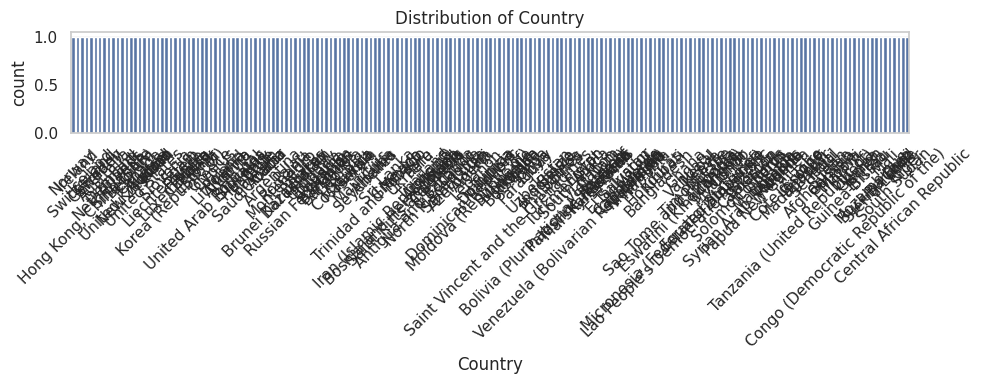

In [ ]:
# 2. Distribution of Categorical Variables
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts())
    plt.figure(figsize=(10, 4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

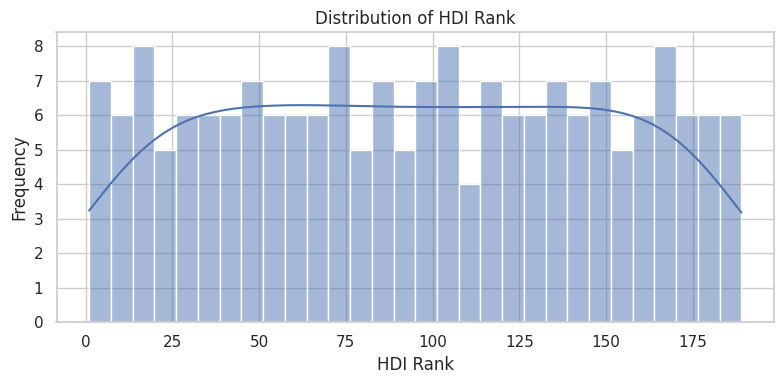

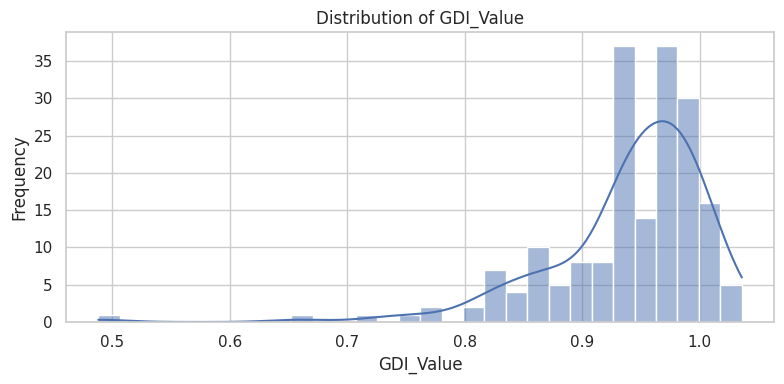

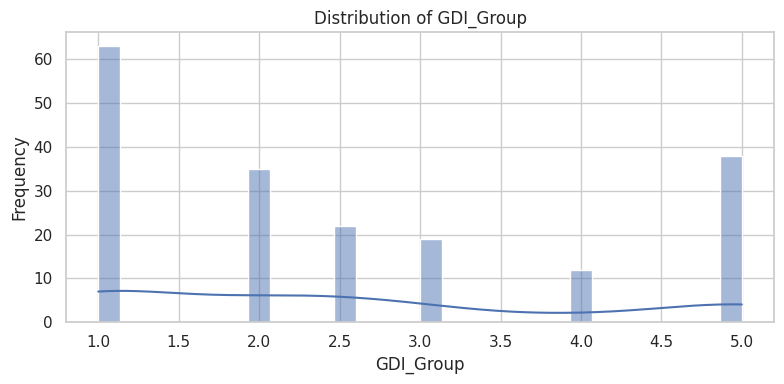

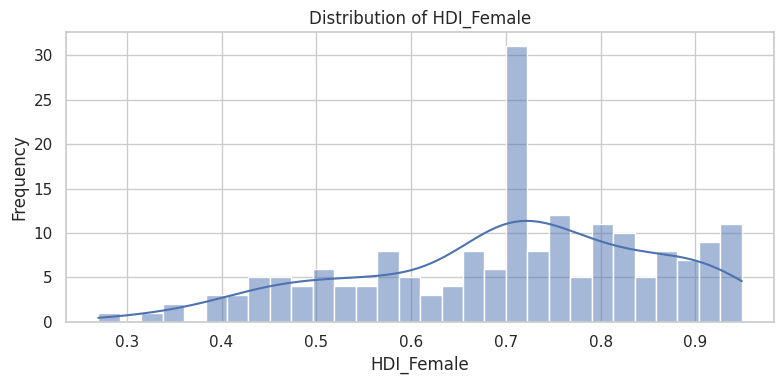

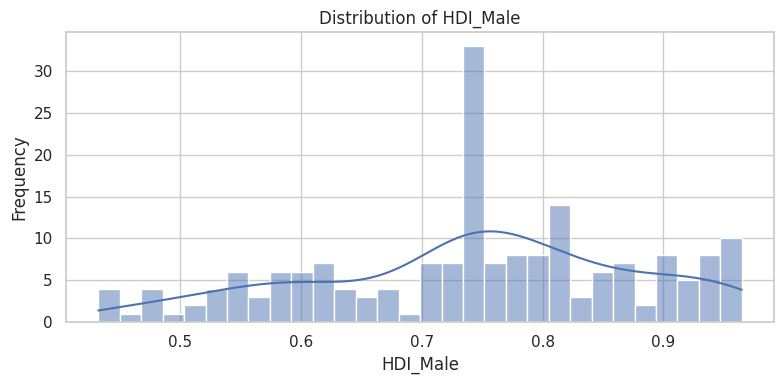

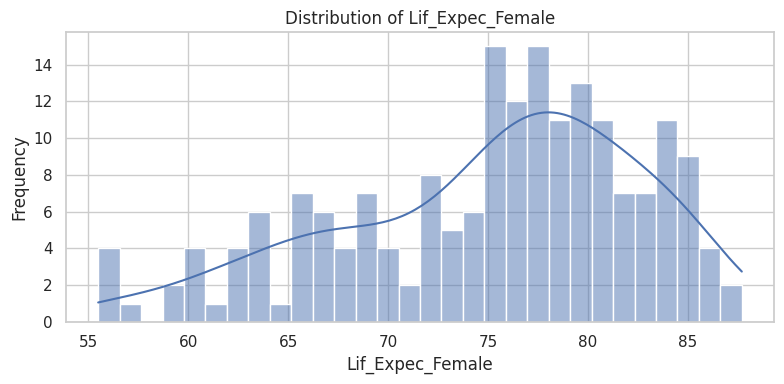

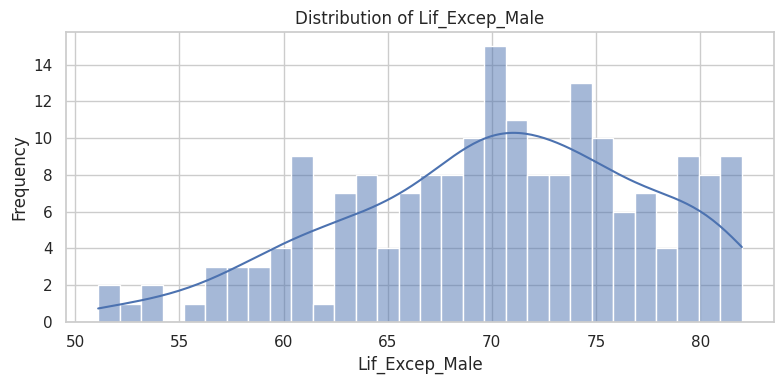

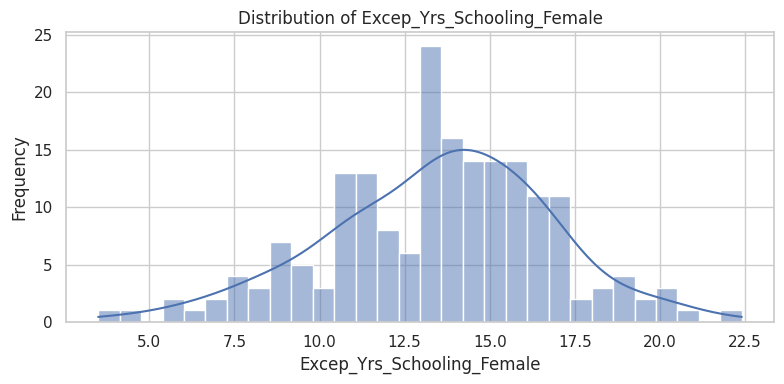

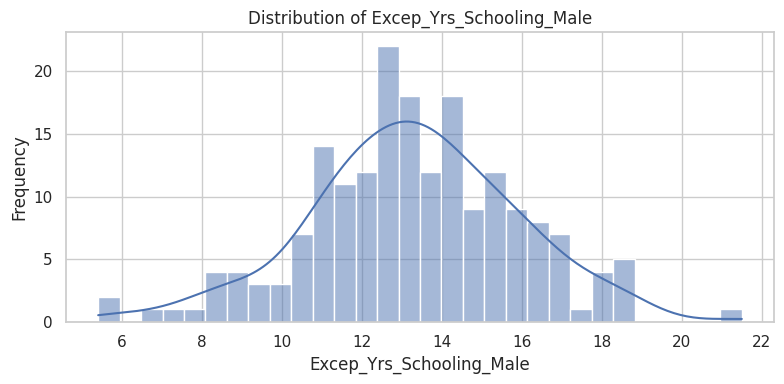

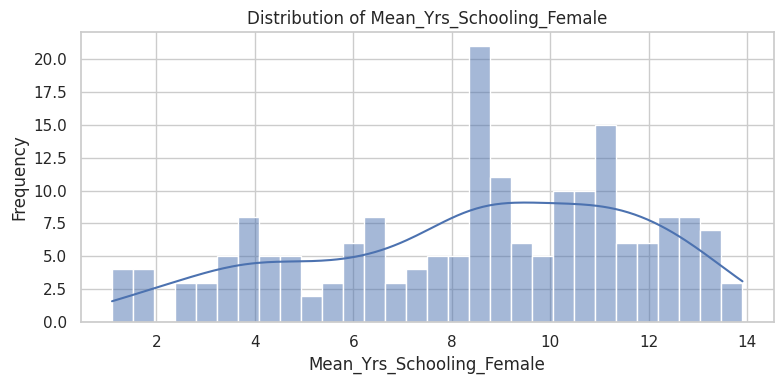

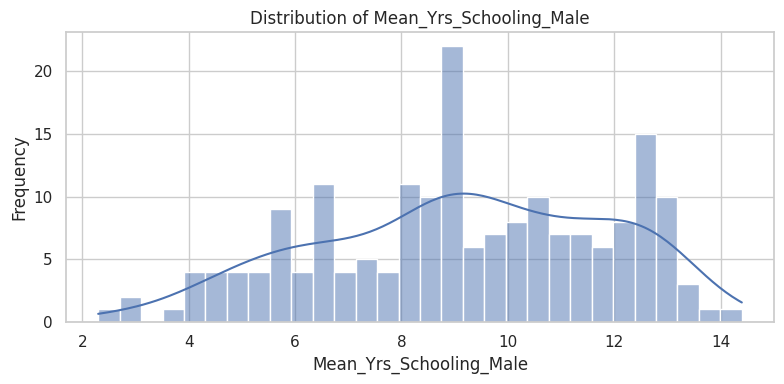

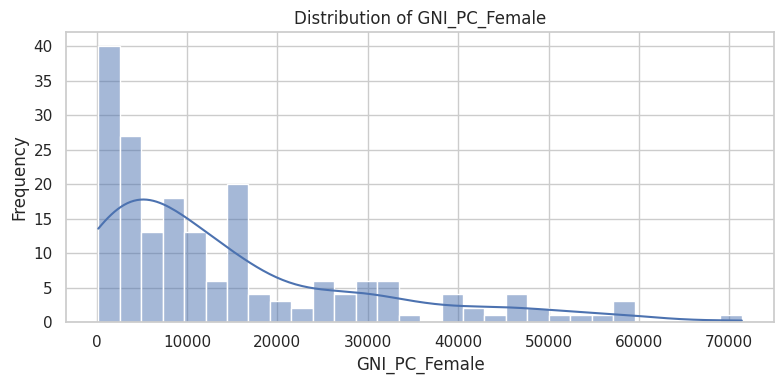

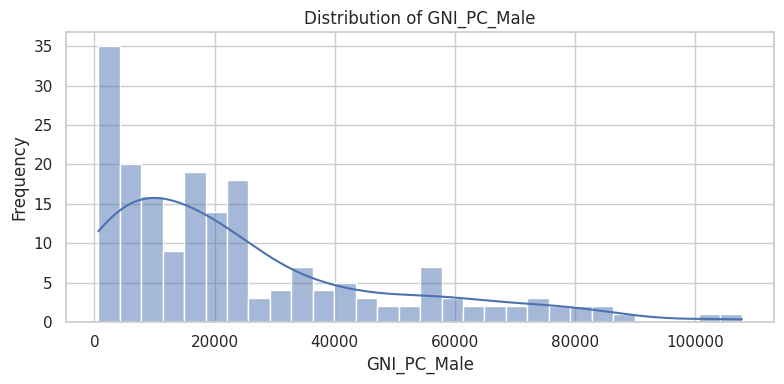

In [ ]:
# 3. Distribution of Numerical Variables
numerical_cols = df.select_dtypes(include=[np.number]).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

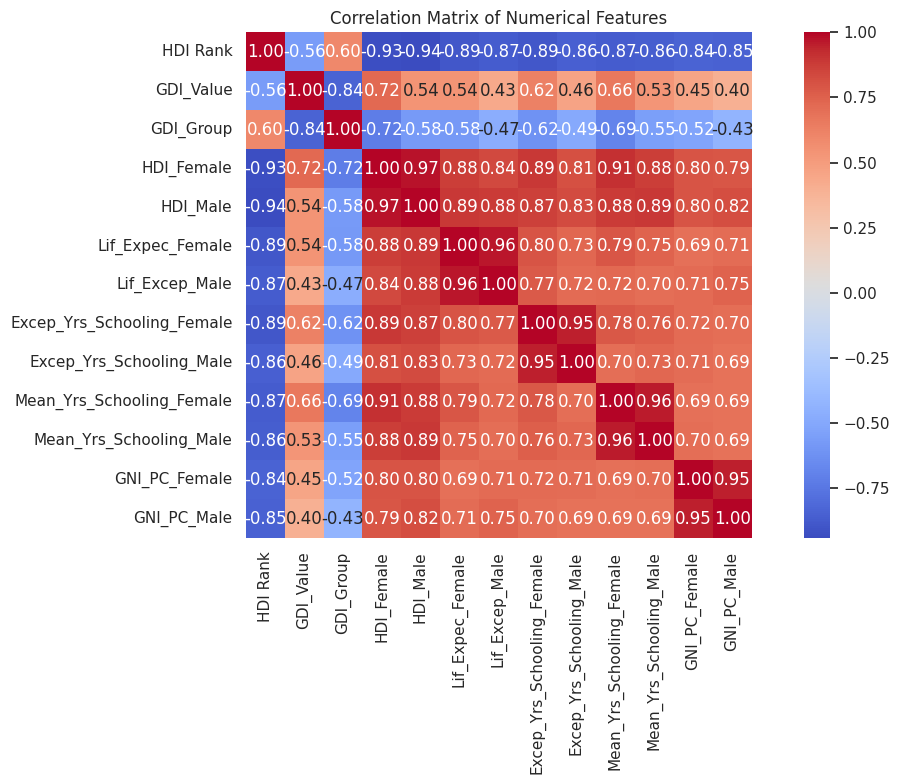

In [ ]:
# 4. Correlation Matrix
plt.figure(figsize=(12, 8))
corr = df[numerical_cols].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

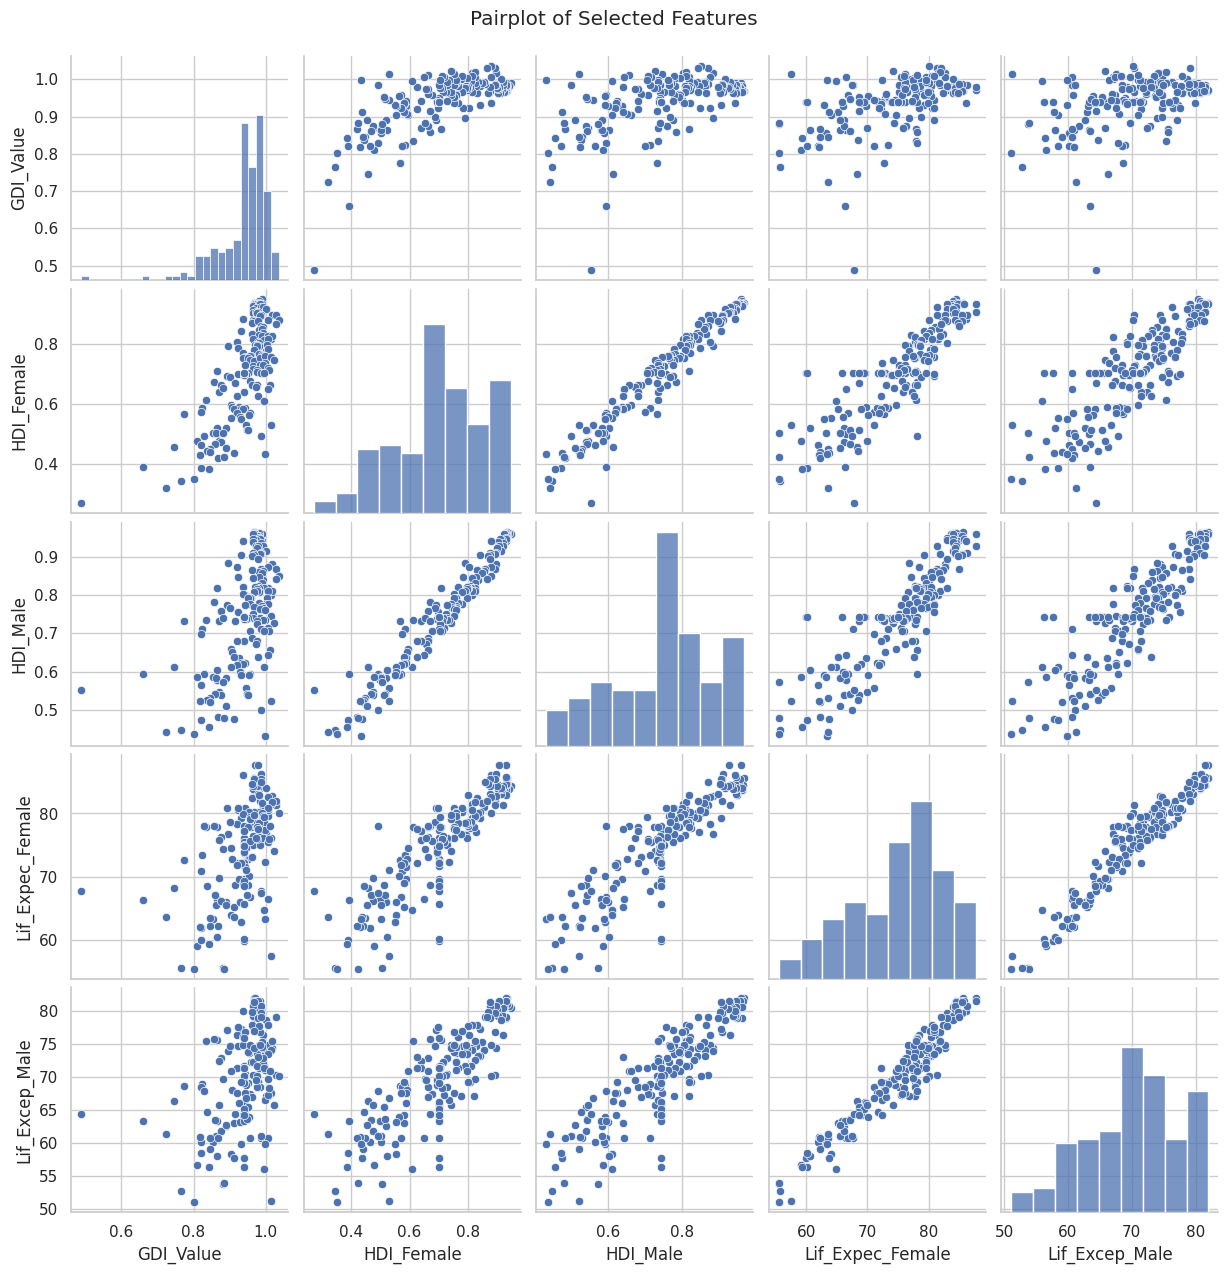

In [ ]:
# 5. Pairplot for Selected Features
selected_features = ['GDI_Value', 'HDI_Female', 'HDI_Male', 'Lif_Expec_Female', 'Lif_Excep_Male']
selected_features = [col for col in selected_features if col in df.columns]
if len(selected_features) >= 2:
    sns.pairplot(df[selected_features])
    plt.suptitle('Pairplot of Selected Features', y=1.02)
    plt.show()

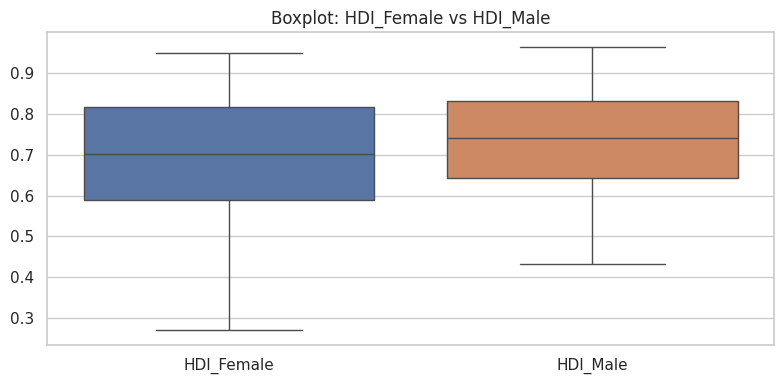

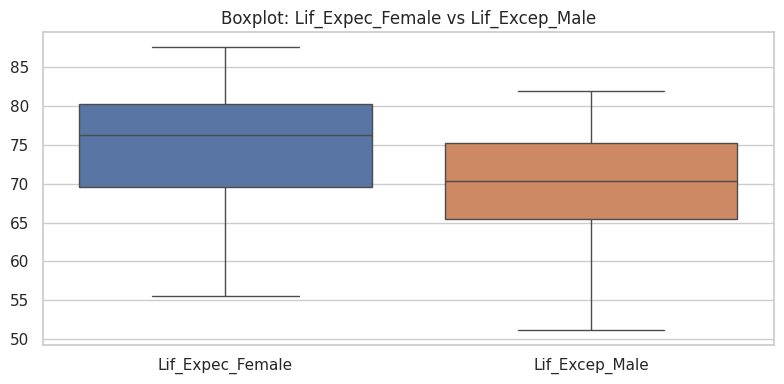

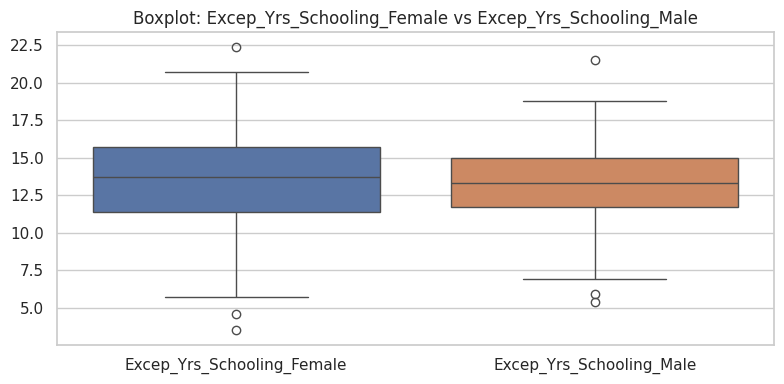

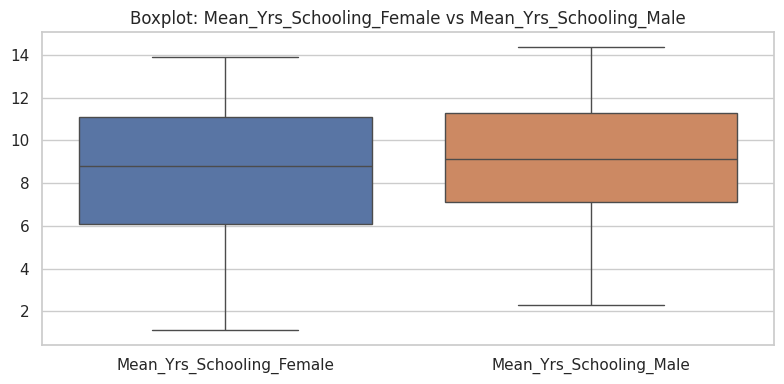

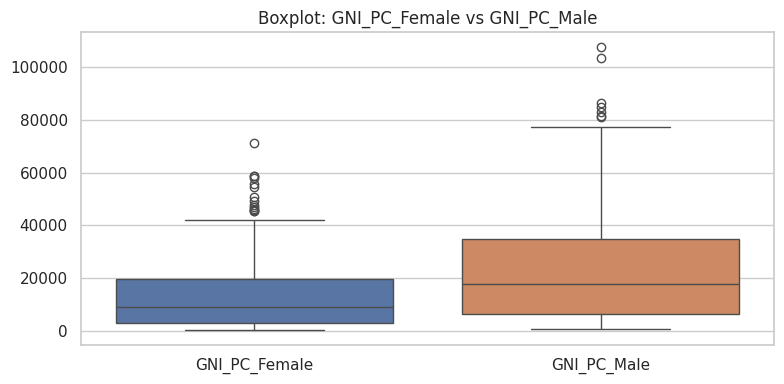

In [ ]:
# 6. Boxplots: Gender Comparison
gender_pairs = [
    ('HDI_Female', 'HDI_Male'),
    ('Lif_Expec_Female', 'Lif_Excep_Male'),
    ('Excep_Yrs_Schooling_Female', 'Excep_Yrs_Schooling_Male'),
    ('Mean_Yrs_Schooling_Female', 'Mean_Yrs_Schooling_Male'),
    ('GNI_PC_Female', 'GNI_PC_Male')
]
for female_col, male_col in gender_pairs:
    if female_col in df.columns and male_col in df.columns:
        plt.figure(figsize=(8, 4))
        sns.boxplot(data=df[[female_col, male_col]])
        plt.title(f'Boxplot: {female_col} vs {male_col}')
        plt.tight_layout()
        plt.show()

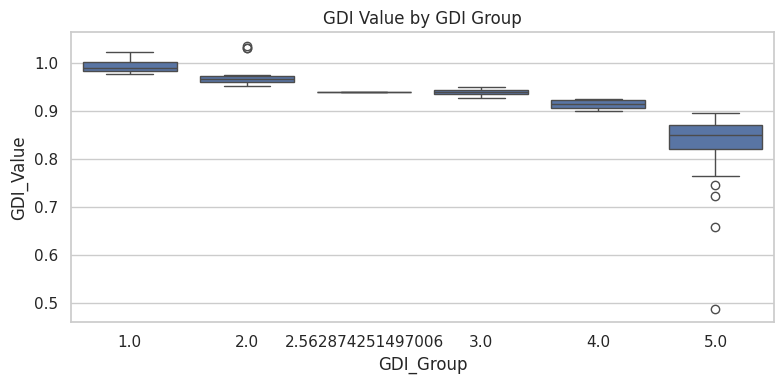

In [ ]:
# 7. Grouped Analysis: GDI_Group vs GDI_Value
if 'GDI_Group' in df.columns and 'GDI_Value' in df.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='GDI_Group', y='GDI_Value')
    plt.title('GDI Value by GDI Group')
    plt.tight_layout()
    plt.show()



Top 10 countries by GDI_Value:
                   Country  GDI_Value
36                  Latvia      1.036
33               Lithuania      1.030
44                   Qatar      1.030
98                Mongolia      1.023
56                  Panama      1.019
28                 Estonia      1.017
54                 Uruguay      1.016
89   Moldova (Republic of)      1.014
164                Lesotho      1.014
127              Nicaragua      1.012

Bottom 10 countries by GDI_Value:
                      Country  GDI_Value
178                     Yemen      0.488
168               Afghanistan      0.659
188                     Niger      0.724
153                  Pakistan      0.745
186                      Chad      0.764
122                      Iraq      0.774
187  Central African Republic      0.801
161             Côte d'Ivoire      0.811
177                    Guinea      0.817
130                     India      0.820


/tmp/ipython-input-13-3372488955.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10, x='GDI_Value', y='Country', palette='Greens_r')


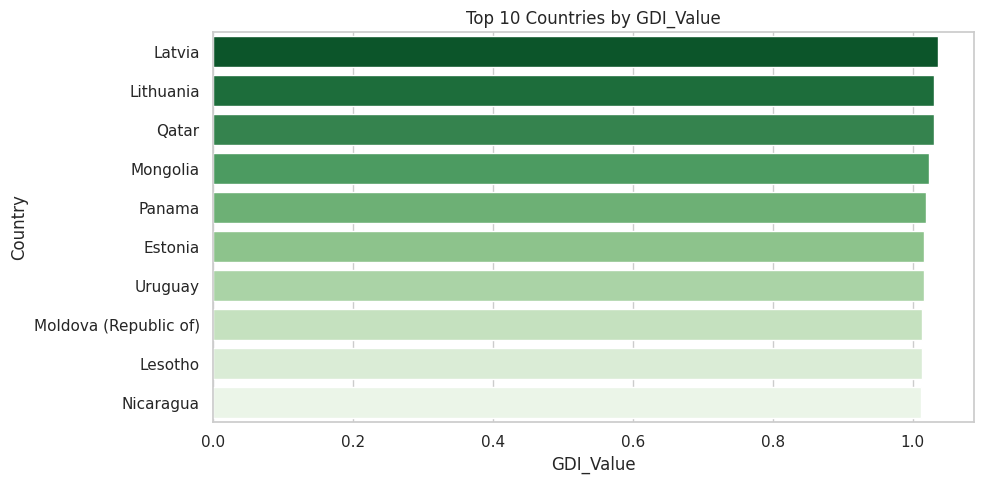

/tmp/ipython-input-13-3372488955.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10, x='GDI_Value', y='Country', palette='Reds')


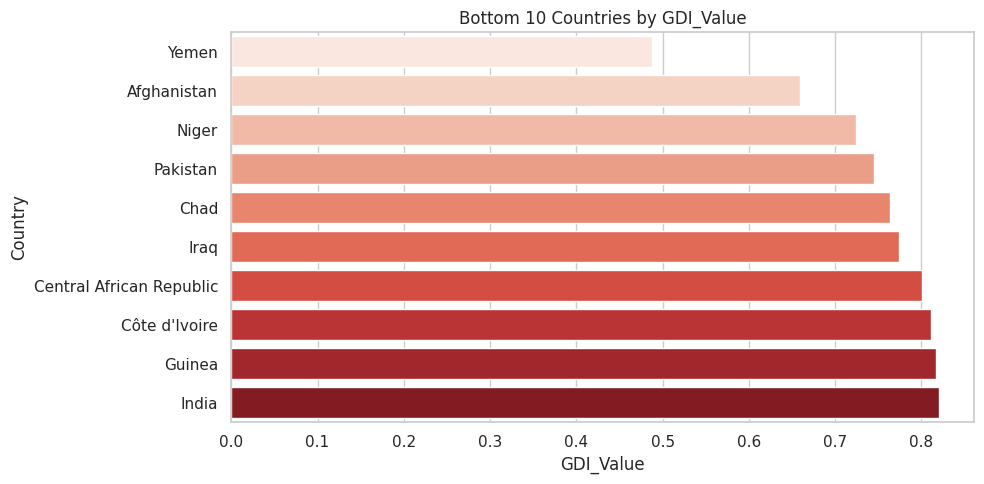

In [ ]:
# 8. Top and Bottom Countries by GDI_Value
if 'Country' in df.columns and 'GDI_Value' in df.columns:
    top_10 = df.nlargest(10, 'GDI_Value')[['Country', 'GDI_Value']]
    bottom_10 = df.nsmallest(10, 'GDI_Value')[['Country', 'GDI_Value']]

    print("\nTop 10 countries by GDI_Value:")
    print(top_10)

    print("\nBottom 10 countries by GDI_Value:")
    print(bottom_10)

    plt.figure(figsize=(10, 5))
    sns.barplot(data=top_10, x='GDI_Value', y='Country', palette='Greens_r')
    plt.title('Top 10 Countries by GDI_Value')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 5))
    sns.barplot(data=bottom_10, x='GDI_Value', y='Country', palette='Reds')
    plt.title('Bottom 10 Countries by GDI_Value')
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# 1. Load the cleaned data
df = pd.read_csv('GDI_cleaned.csv')

# 2. Encode categorical columns if any
categorical_cols = df.select_dtypes(include='object').columns.tolist()
le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    le_dict[col] = le

# 3. Select features and target
# Example: Predicting GDI_Value using the rest. Adjust as needed.
target_col = 'GDI_Value'
feature_cols = [col for col in df.columns if col != target_col and col != 'Country']

X = df[feature_cols]
y = df[target_col]

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Model training
lr = LinearRegression()
lr.fit(X_train, y_train)

# 6. Predictions
y_pred = lr.predict(X_test)

# 7. Evaluation
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Results:")
print(f"RMSE: {rmse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# 8. (Optional) Display coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
print("\nFeature Coefficients:")
print(coef_df.sort_values('Coefficient', ascending=False))


Linear Regression Results:
RMSE: 0.0095
R^2 Score: 0.9722

Feature Coefficients:
                       Feature   Coefficient
2                   HDI_Female  1.702849e+00
7     Excep_Yrs_Schooling_Male  2.786732e-03
1                    GDI_Group  2.600043e-03
5               Lif_Excep_Male  1.457066e-03
9      Mean_Yrs_Schooling_Male  6.824937e-04
8    Mean_Yrs_Schooling_Female  4.151488e-04
0                     HDI Rank  1.825423e-04
11                 GNI_PC_Male  4.296830e-07
10               GNI_PC_Female -1.227554e-06
6   Excep_Yrs_Schooling_Female -7.341132e-04
4             Lif_Expec_Female -7.863855e-04
3                     HDI_Male -1.570541e+00


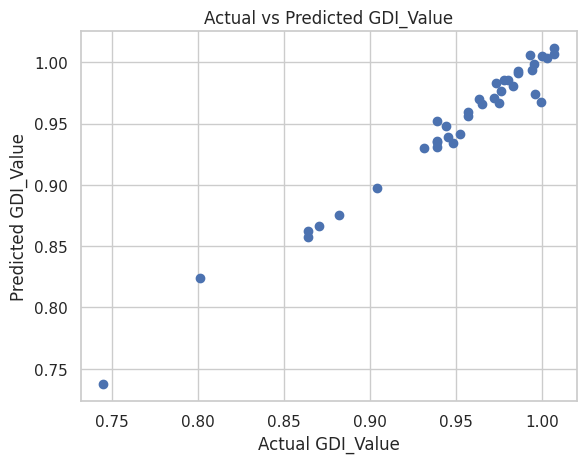

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel("Actual GDI_Value")
plt.ylabel("Predicted GDI_Value")
plt.title("Actual vs Predicted GDI_Value")
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred_lr

# Histogram of residuals
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.show()

# Residuals vs Predicted values
plt.figure(figsize=(6,4))
plt.scatter(y_pred_lr, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted GDI_Value')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted Values')
plt.show()


NameError: name 'y_pred_lr' is not defined

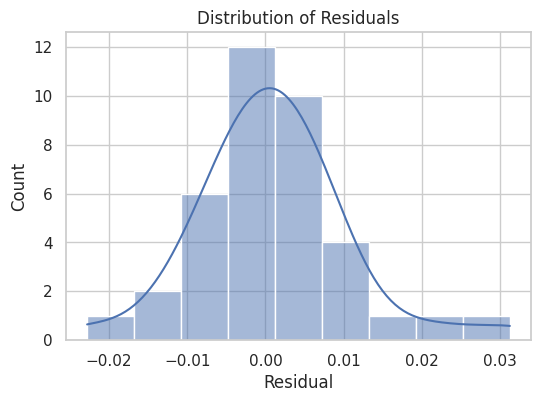

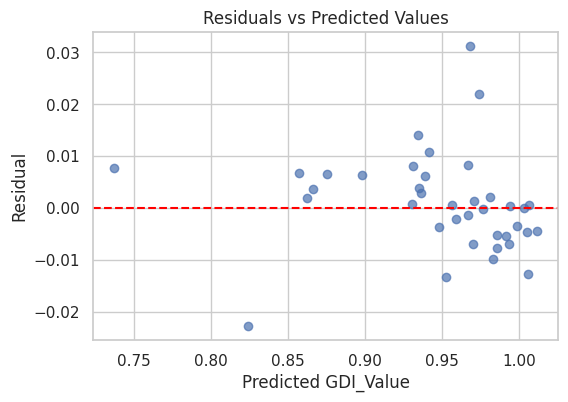

In [ ]:
# 1. Fit your linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

# 2. Predict on the test set
y_pred_lr = lr.predict(X_test)

# 3. Now you can safely do residual analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred_lr

# Histogram of residuals
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residual')
plt.show()

# Residuals vs Predicted values
plt.figure(figsize=(6,4))
plt.scatter(y_pred_lr, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted GDI_Value')
plt.ylabel('Residual')
plt.title('Residuals vs Predicted Values')
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
import pandas as pd
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


                       feature          VIF
0                     HDI Rank    18.982009
1                    GDI_Group    21.539308
2                   HDI_Female  1414.188943
3                     HDI_Male  1999.167977
4             Lif_Expec_Female  2282.450761
5               Lif_Excep_Male  2457.008796
6   Excep_Yrs_Schooling_Female   427.412709
7     Excep_Yrs_Schooling_Male   442.433583
8    Mean_Yrs_Schooling_Female   229.720103
9      Mean_Yrs_Schooling_Male   327.237891
10               GNI_PC_Female    28.567718
11                 GNI_PC_Male    34.308067


                       Feature   Coefficient
2                   HDI_Female  1.702849e+00
7     Excep_Yrs_Schooling_Male  2.786732e-03
1                    GDI_Group  2.600043e-03
5               Lif_Excep_Male  1.457066e-03
9      Mean_Yrs_Schooling_Male  6.824937e-04
8    Mean_Yrs_Schooling_Female  4.151488e-04
0                     HDI Rank  1.825423e-04
11                 GNI_PC_Male  4.296830e-07
10               GNI_PC_Female -1.227554e-06
6   Excep_Yrs_Schooling_Female -7.341132e-04
4             Lif_Expec_Female -7.863855e-04
3                     HDI_Male -1.570541e+00


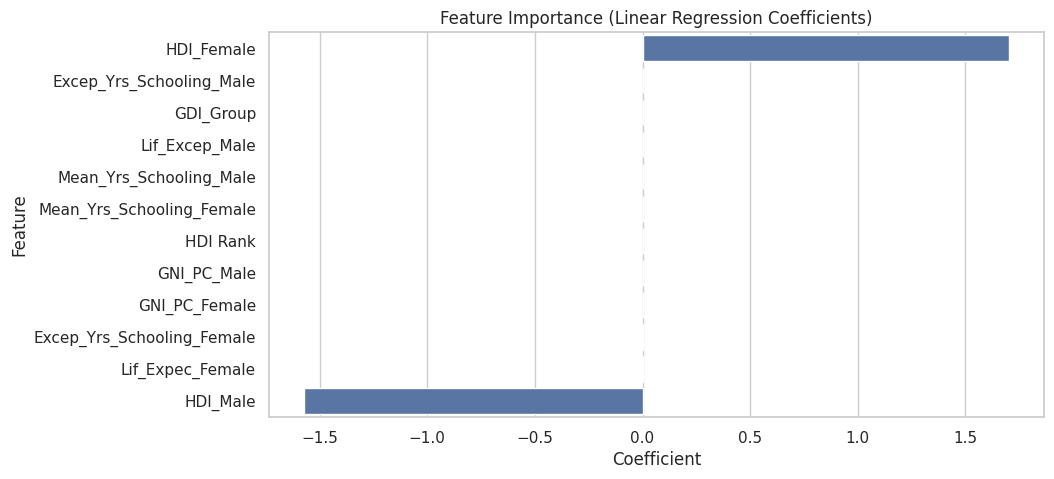

In [ ]:
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': lr.coef_})
coef_df = coef_df.sort_values('Coefficient', ascending=False)
print(coef_df)
plt.figure(figsize=(10,5))
sns.barplot(x='Coefficient', y='Feature', data=coef_df)
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.show()


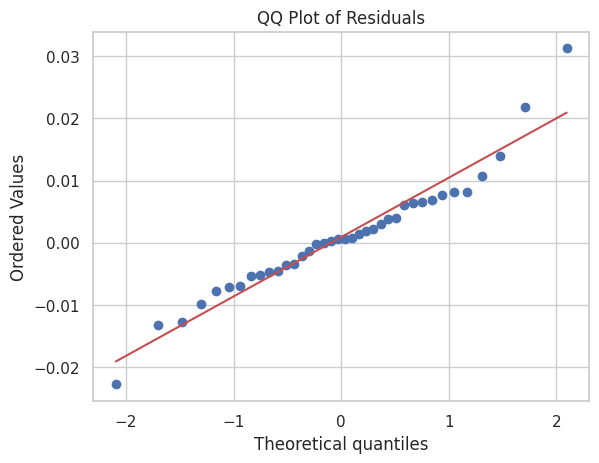

In [ ]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ Plot of Residuals')
plt.show()


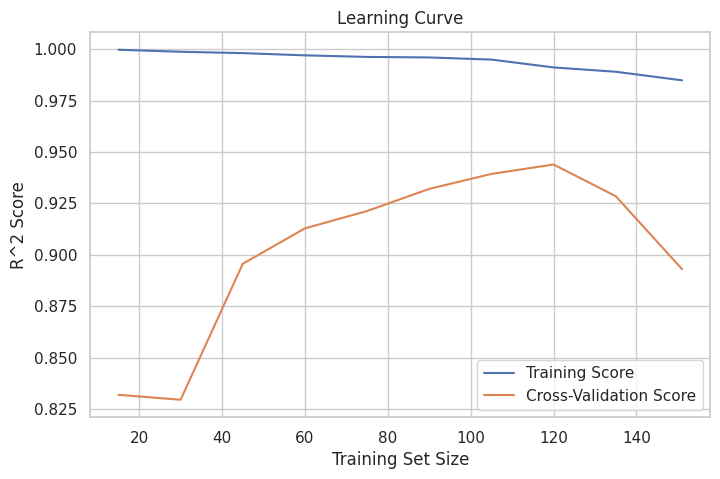

In [ ]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    lr, X, y, cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(8,5))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Training Set Size')
plt.ylabel('R^2 Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [2]:
import shap
from sklearn.linear_model import LinearRegression

# Fit your model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Use LinearExplainer for linear models
explainer = shap.Explainer(lr, X_train)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)


NameError: name 'X_train' is not defined

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Load your cleaned data
df = pd.read_csv('GDI_cleaned.csv')  # or 'GDI_cleaned.csv' if you have it

# Encode categorical columns if needed
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Define features and target
target_col = 'GDI_Value'
feature_cols = [col for col in df.columns if col != target_col and col != 'Country']

X = df[feature_cols]
y = df[target_col]


In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


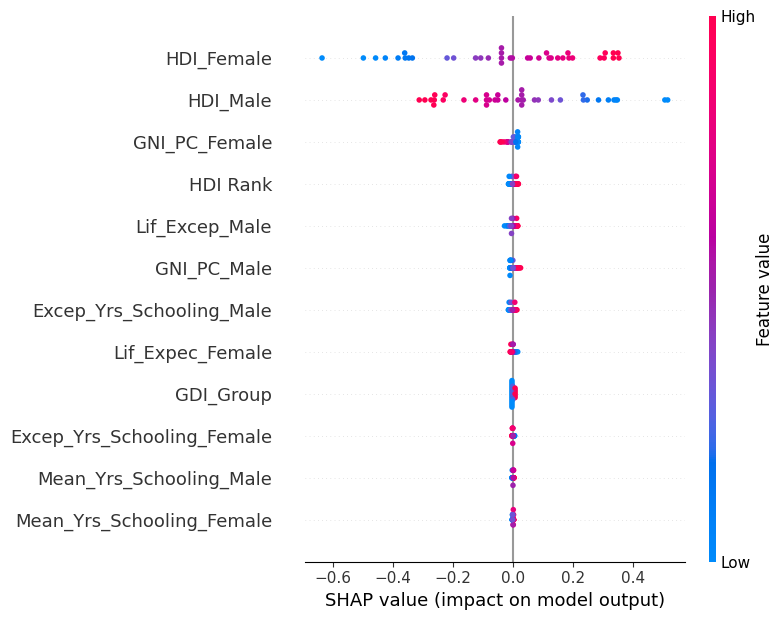

In [6]:
from sklearn.linear_model import LinearRegression
import shap

# Fit your model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Use SHAP's LinearExplainer
explainer = shap.Explainer(lr, X_train)
shap_values = explainer(X_test)

# SHAP summary plot
shap.summary_plot(shap_values, X_test, feature_names=X.columns)
